## Supervised/Umsupervised/Half-supervised dimension reduction through UMAP.
## Comparation with Stim map is possible here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import arff
import pandas as pd
from My_Wheels.Kill_Cache import kill_all_cache

wp = r'D:\ZR\_Codes\2P_Analysis\_Projects\230412_UMAP_Learning'
conda_folder = r'C:\ProgramData\anaconda3\envs\umapzr'

kill_all_cache(conda_folder)
mnist = np.array(pd.DataFrame(arff.loadarff(wp+'\Fashion-MNIST.arff')[0]))
mnist_data = mnist[:,:-1]
mnist_label = mnist[:,-1].astype('i4')


In [2]:
# seperate data into train and test.
train, train_labels = mnist_data[:60000],mnist_label[:60000]
test, test_labels = mnist_data[60000:],mnist_label[60000:]
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

## First, Traditional unsupervised learning.

In [3]:
import umap
embedding = umap.UMAP(n_neighbors=5).fit_transform(data)
# neighbors = 5 means very local information.

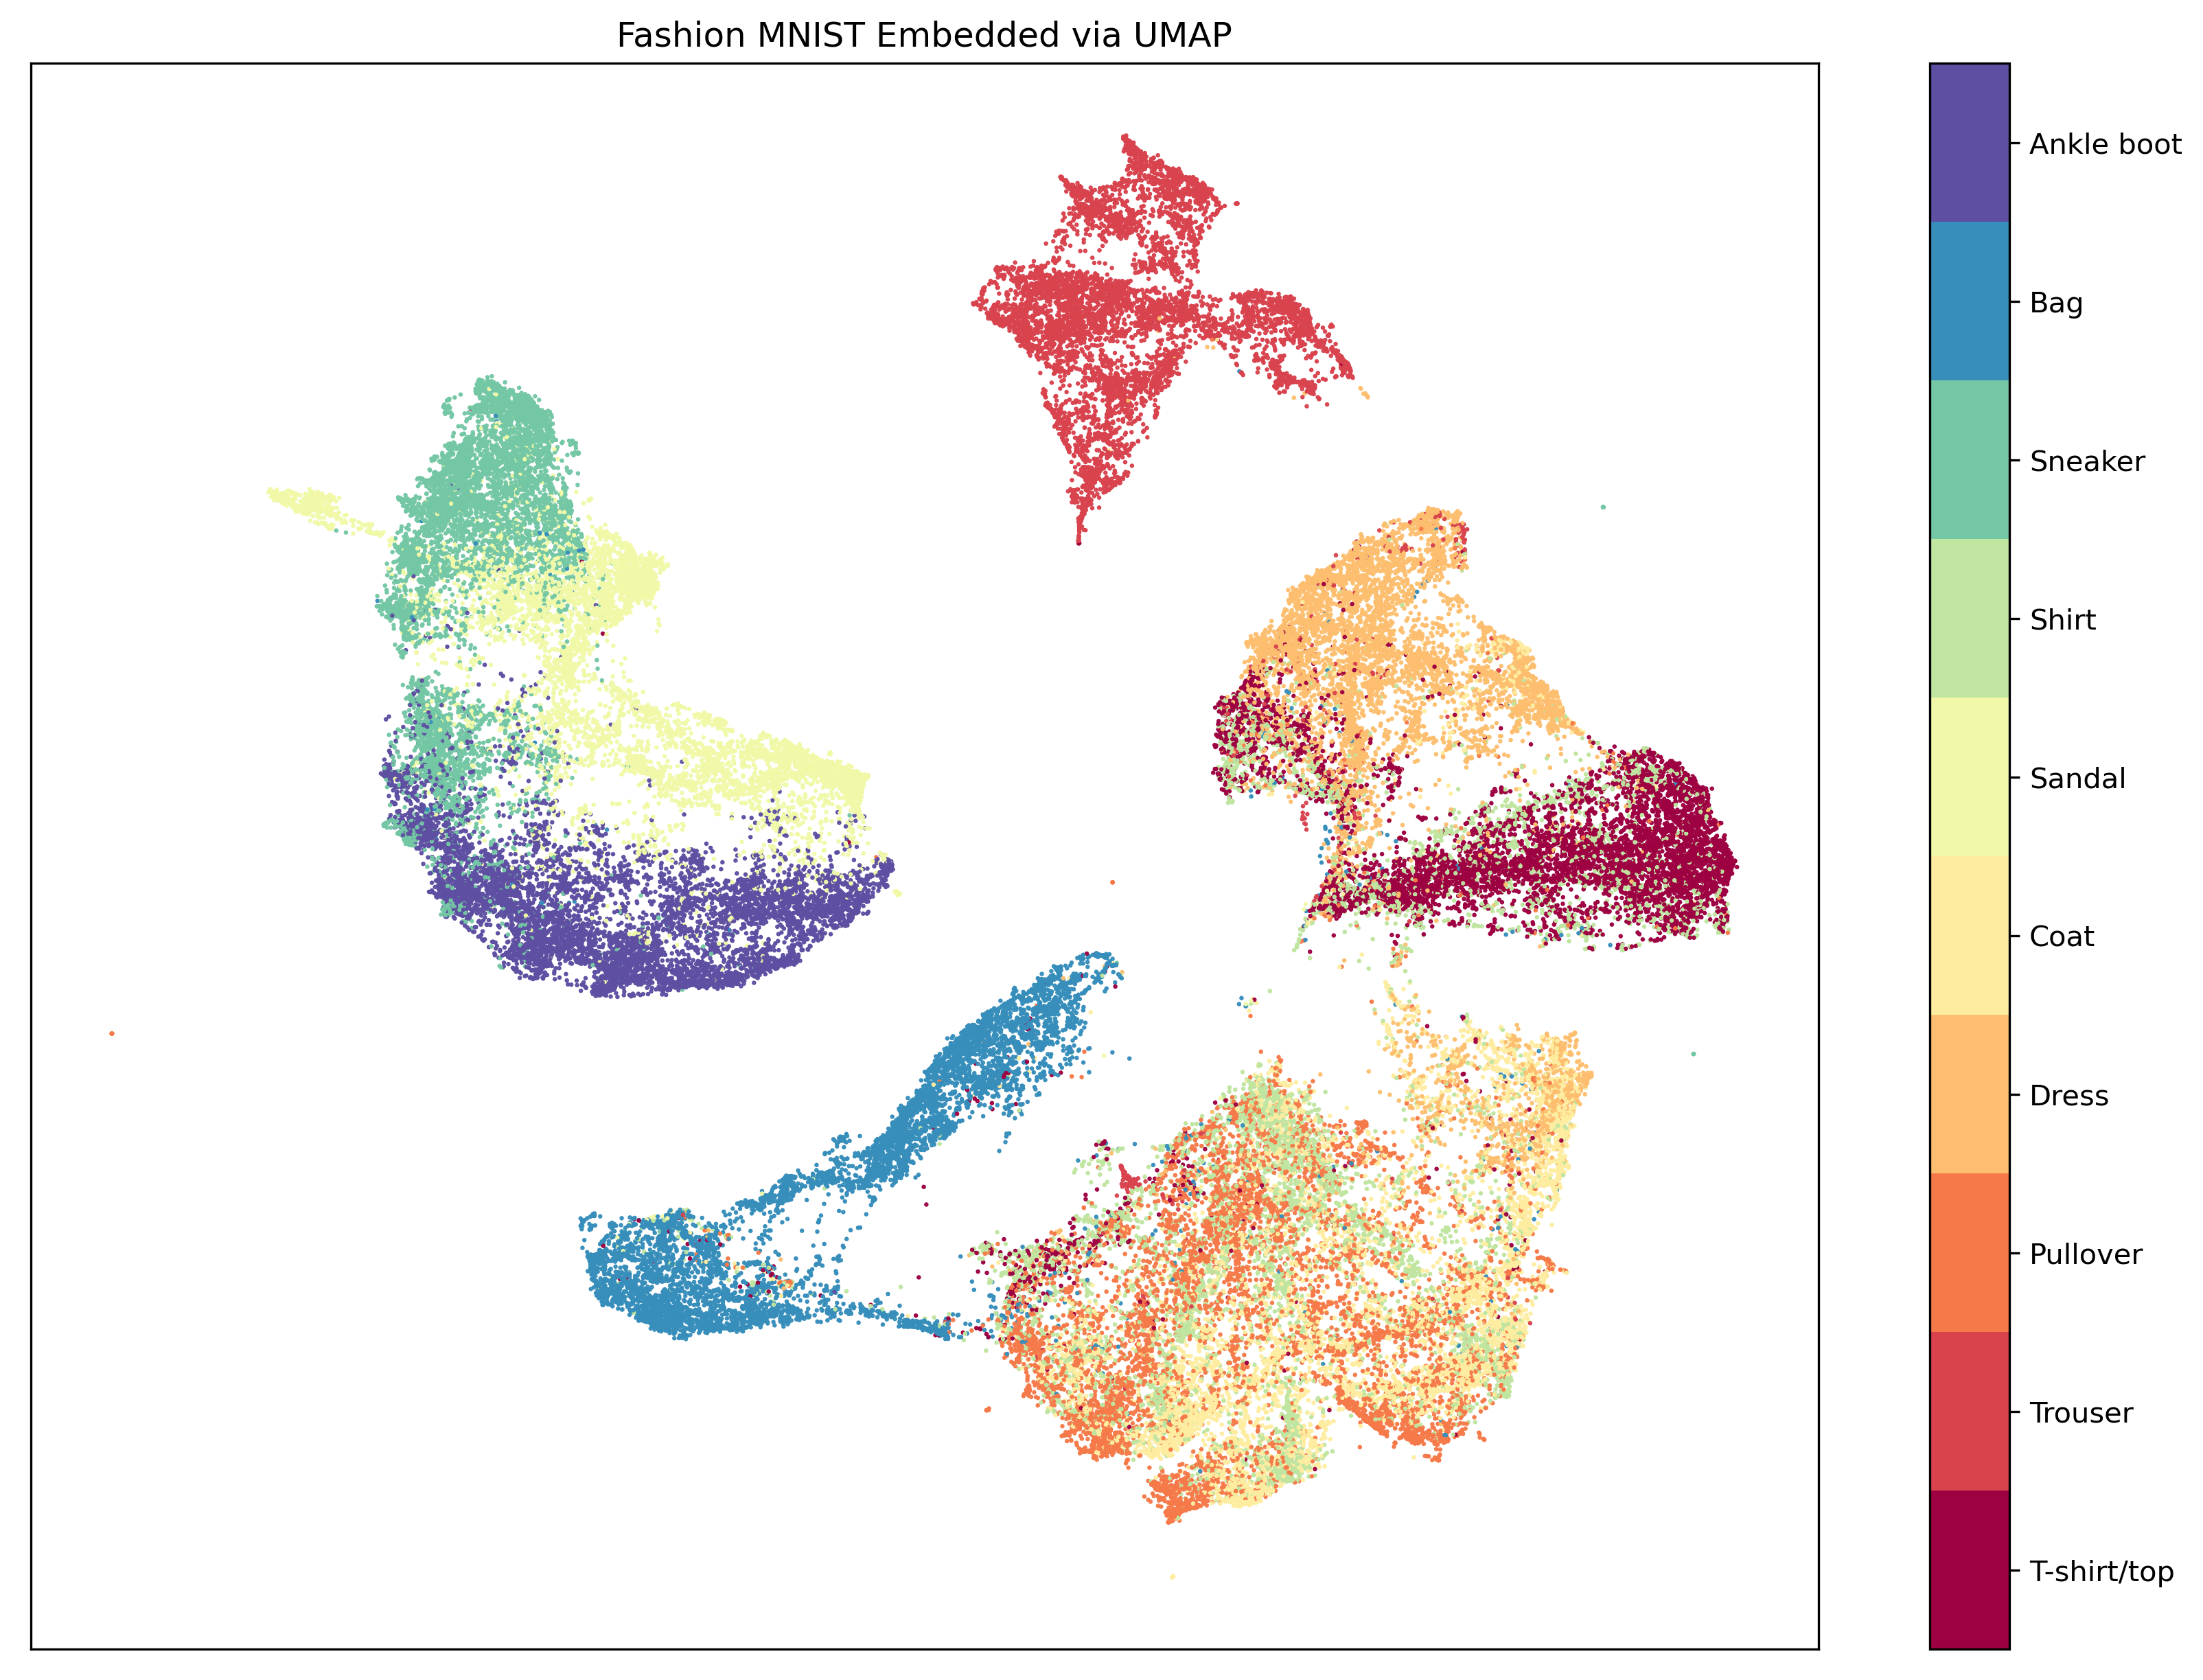

In [4]:
fig, ax = plt.subplots(1, figsize=(14, 10),dpi = 300)
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');

### ↑This result is okay for unsupervised data. But still, some clusters are not seperated.
### ↓ Supervised Learning will solve this problem

CPU times: total: 25min 43s
Wall time: 58.1 s


Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP using Labels')

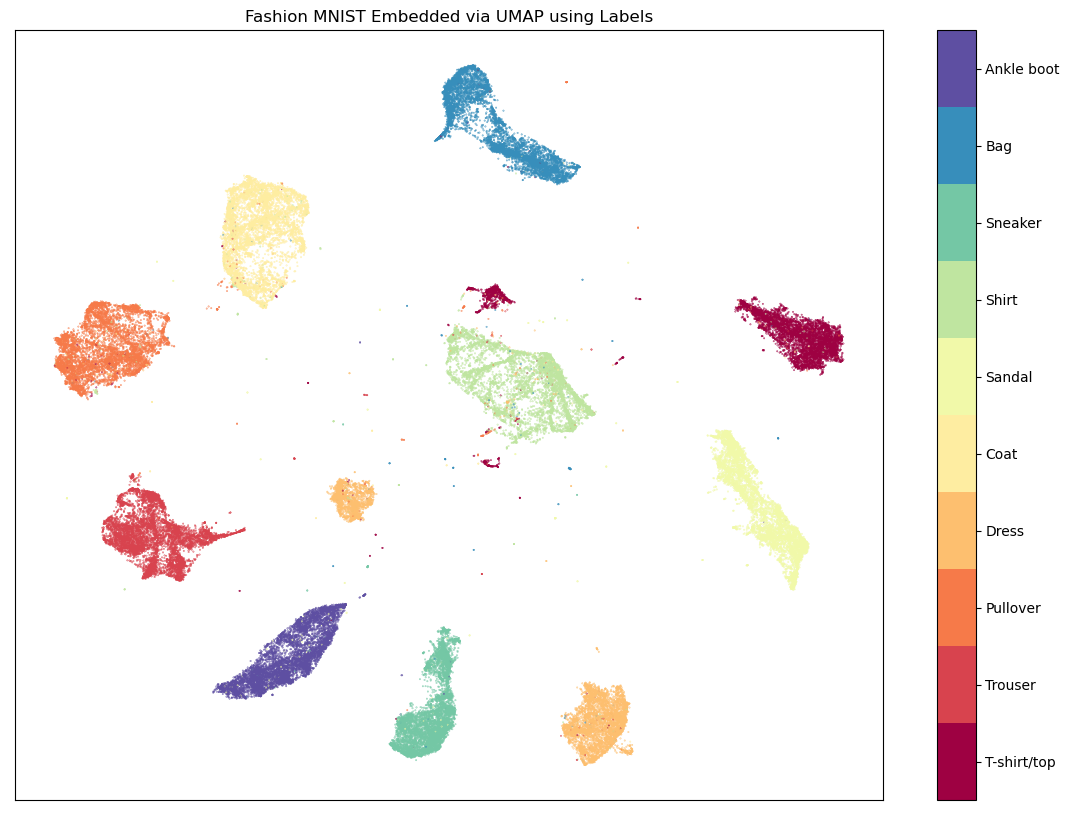

In [5]:
%%time
# remember, bigger n-neighbor is better for supervised learning.
embedding = umap.UMAP().fit_transform(data, y=target) # almost the same, just hand in y=target.
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

#### Half supervised learning means that only part of the data have lable, in our data, it can indicate simutaneousa input of spon and stim data.

In [6]:
masked_target = target.copy().astype(np.int8)
masked_target[np.random.choice(70000, size=10000, replace=False)] = -1
# Null random 10000 labels. Replace them with -1.

In [13]:
%%time
# fit with masked data, this is a half supervised learning.
fitter = umap.UMAP().fit(data, y=masked_target)
embedding = fitter.embedding_

CPU times: total: 24min 43s
Wall time: 51 s


Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP using Partial Labels')

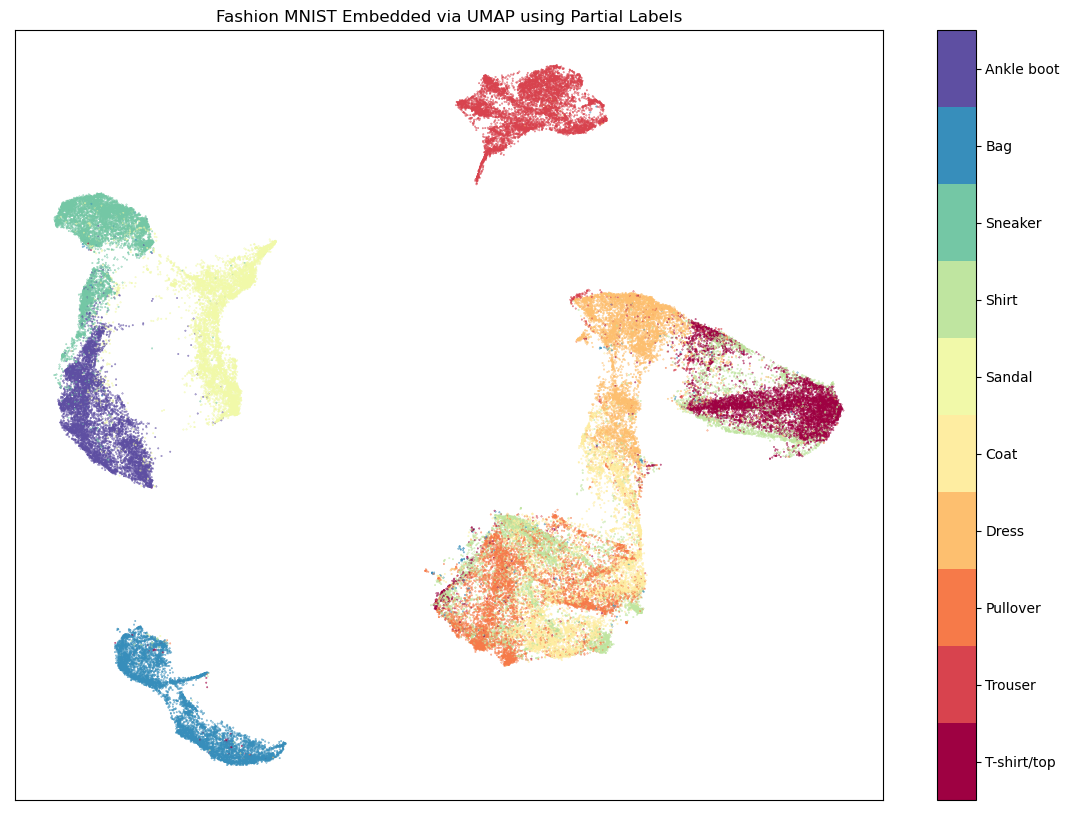

In [14]:
# plot half supervised learning data.
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Partial Labels')

### This can direct use for classification.
### Usage is the same as supervised learning. Train with labled data and plot spon

In [15]:
%%time
train_data = np.array(train)
test_data = np.array(test)
mapper = umap.UMAP(n_neighbors=10).fit(train_data, np.array(train_labels))# fit function accept input x,y as usual.

CPU times: total: 18min 24s
Wall time: 43.1 s


In [16]:
%%time
# embed test data on trained manifold.
test_embedding = mapper.transform(test_data) # transform to put raw data on manifold space.

CPU times: total: 1min 22s
Wall time: 37.3 s
